<a href="https://colab.research.google.com/github/Salsabil-Ouni/Predicting-salaries-using-pyspark/blob/main/salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

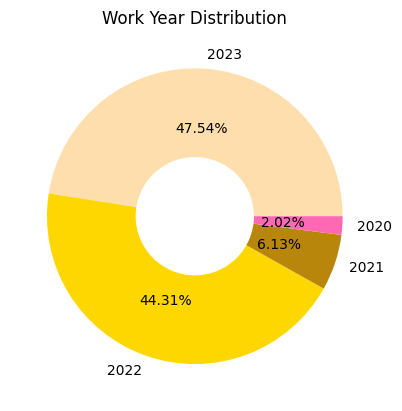

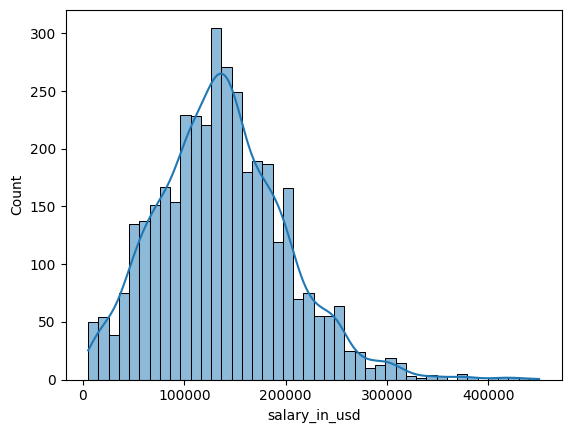

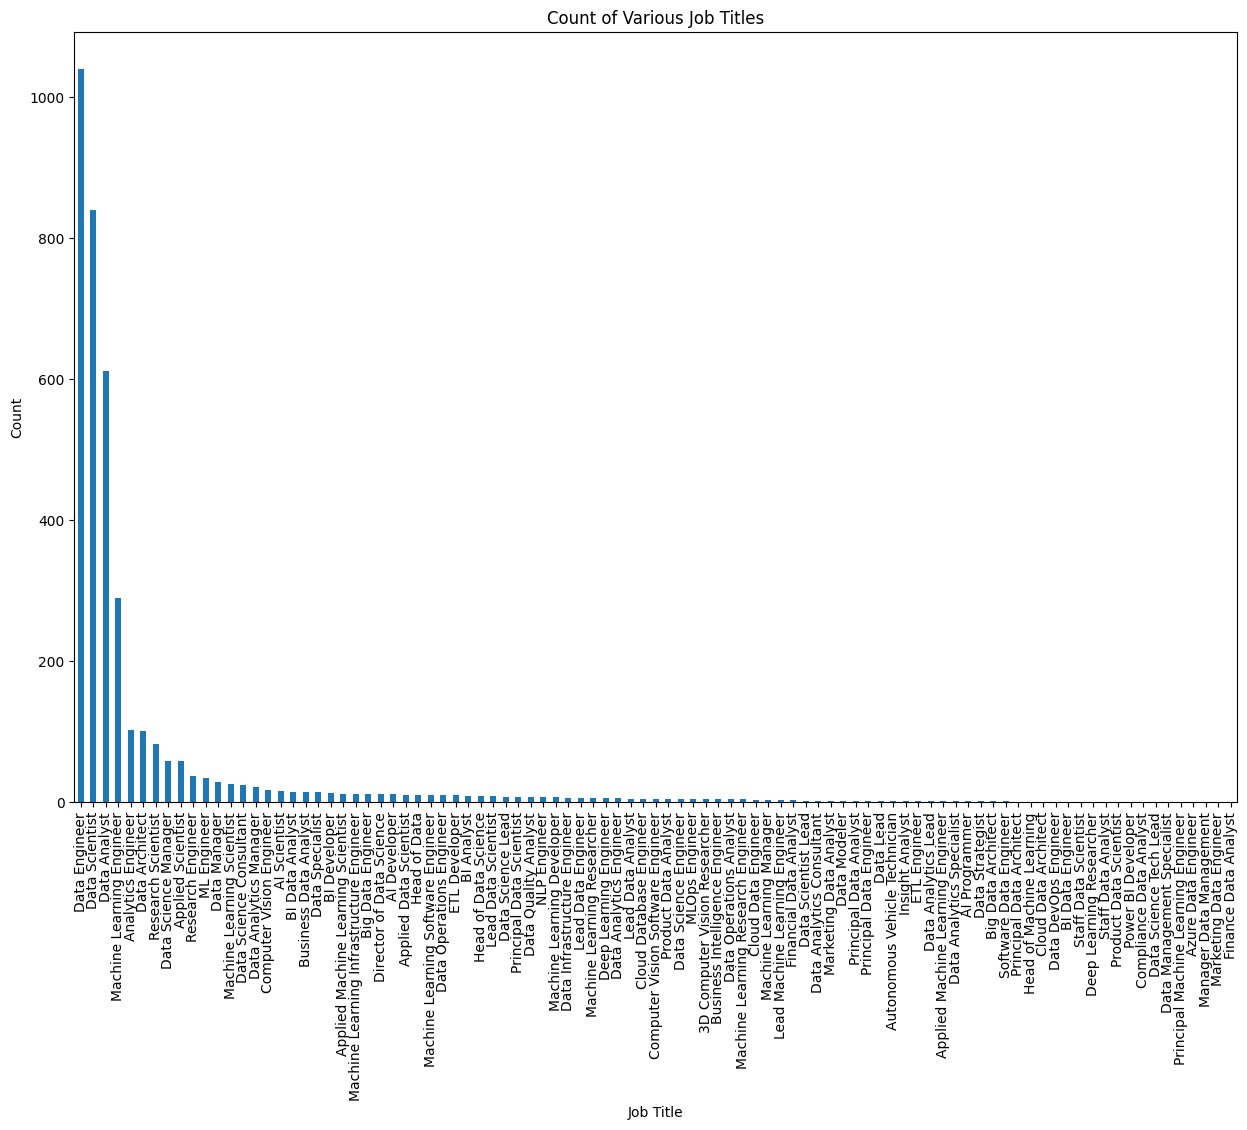

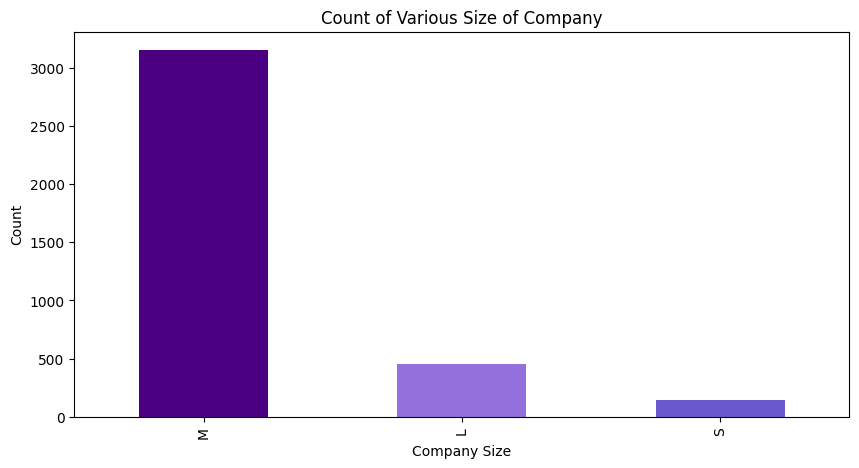

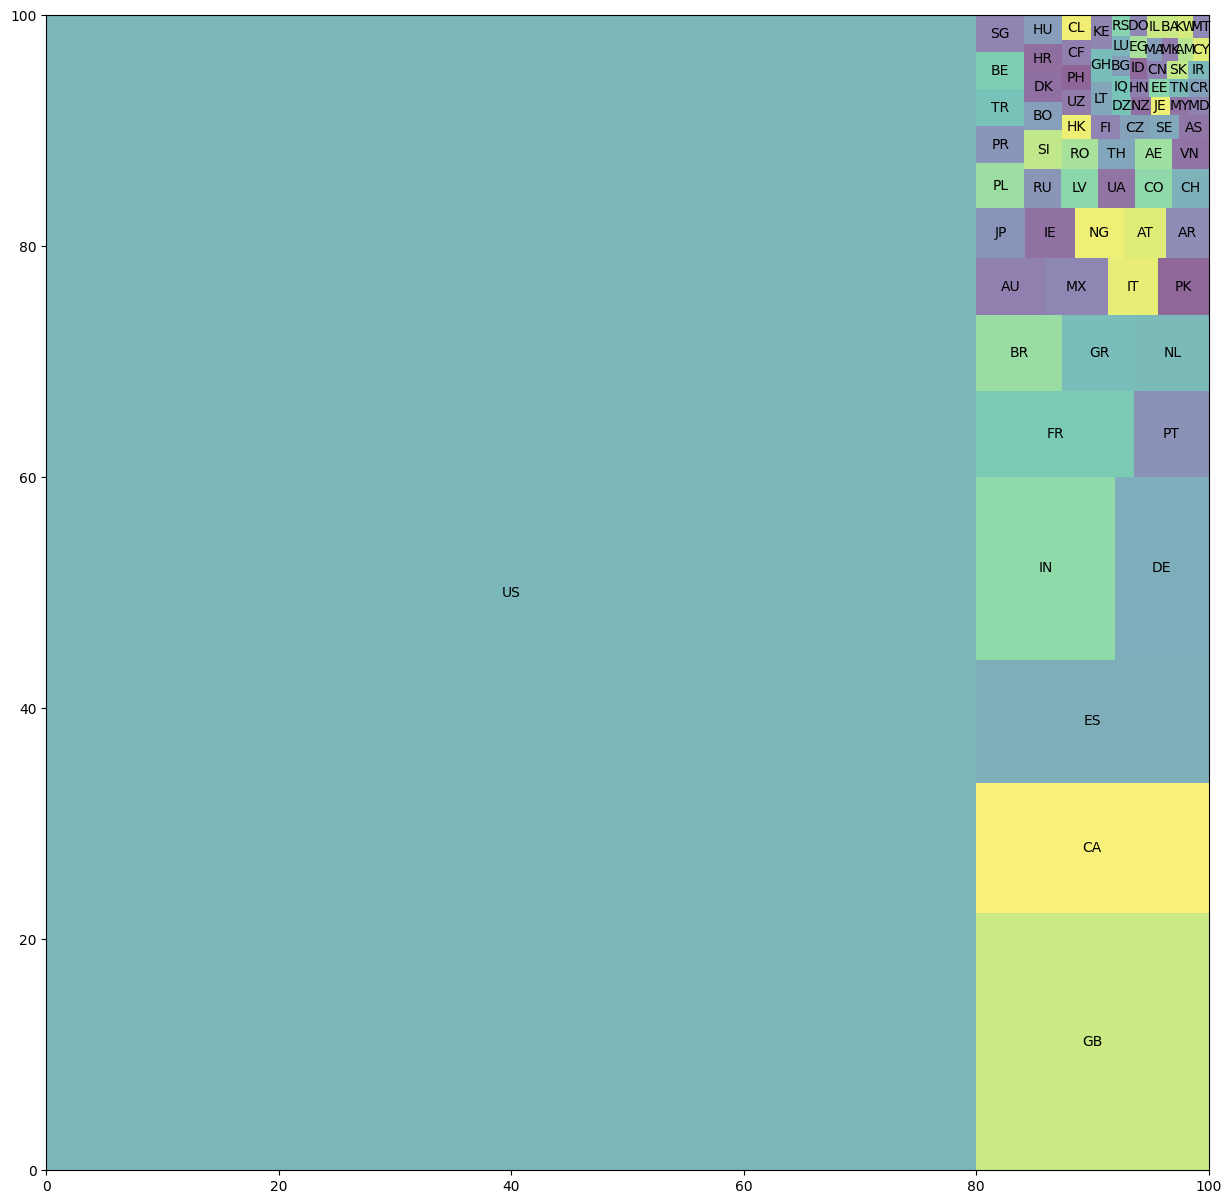

Accuracy: 85.86%


In [4]:
!pip install country_converter
import numpy as np # linear algebra
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import country_converter as coco # in Google colab Country_converter to be installed

from sklearn.metrics import accuracy_score
df = pd.read_csv("ds_salaries.csv")
Year_data = df['work_year'].value_counts()
colors = ['navajowhite', 'gold', 'darkgoldenrod', 'hotpink']
fig,ax=plt.subplots()
ax.pie(Year_data.values,labels=Year_data.index,autopct='%1.2f%%', colors = colors )
ax.pie([1],radius=0.40,colors='white')
plt.title('Work Year Distribution')
plt.show()
sns.histplot(data=df, x ='salary_in_usd', kde = True)
df['job_title'].value_counts()
count = df['job_title'].value_counts()

plt.figure(figsize = (15,10))
count.plot(kind = 'bar')
plt.title('Count of Various Job Titles')
plt.xlabel('Job Title')
plt.xticks(rotation =90)
plt.ylabel('Count')
plt.show()
count = df['company_size'].value_counts()

plt.figure(figsize = (10,5))
colors = ['indigo', 'mediumpurple', 'slateblue']
count.plot(kind = 'bar', color = colors)
plt.title('Count of Various Size of Company')
plt.xlabel('Company Size')
plt.xticks(rotation =90)
plt.ylabel('Count')
plt.show()
count = df['employee_residence'].value_counts()
count
!pip install squarify
import squarify
plt.figure(figsize = (15,15))
count = df['employee_residence'].value_counts()
squarify.plot(sizes=count, label=count.index, alpha=0.6)
plt.show()
df1 = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
df1['company_location']=coco.convert(names=df1['company_location'], to='ISO3')
fig=px.choropleth(df1,
                  locations='company_location',
                  color='salary_in_usd',
title='Distribution of Employer Headquarters by Country')
fig.show()
actual_values = df['salary_in_usd']
predicted_values = df['salary']

# Calculate accuracy
accuracy = accuracy_score(actual_values, predicted_values)
print(f'Accuracy: {accuracy * 100:.2f}%')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=c7e683b8ccb2f1724ee55b2d501e89778adcc01699df2fb2363602f2cbed3b21
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


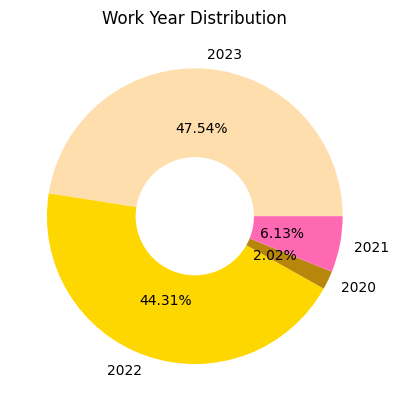

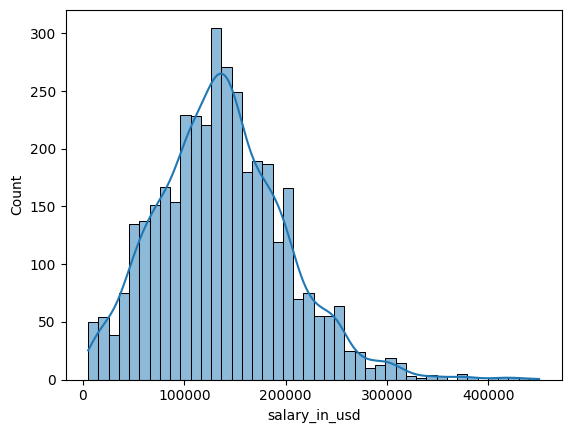

<Figure size 1500x1000 with 0 Axes>

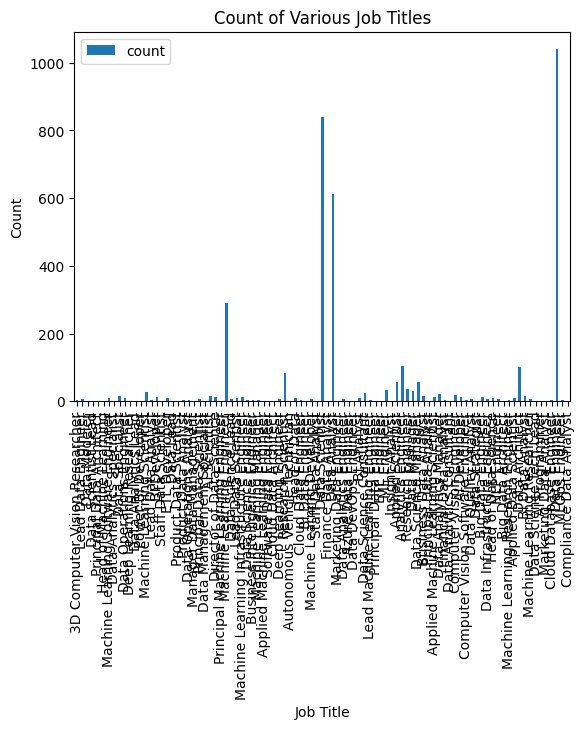

<Figure size 1000x500 with 0 Axes>

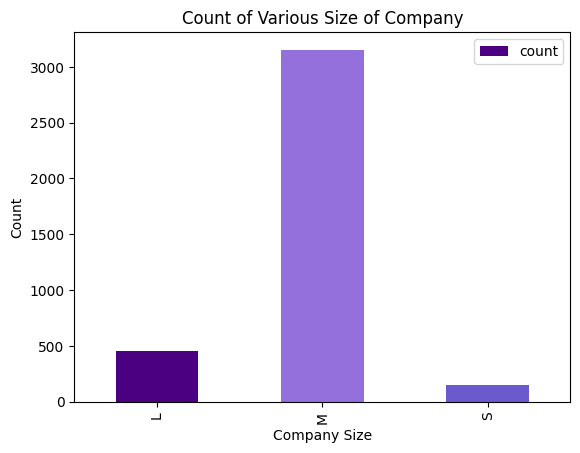

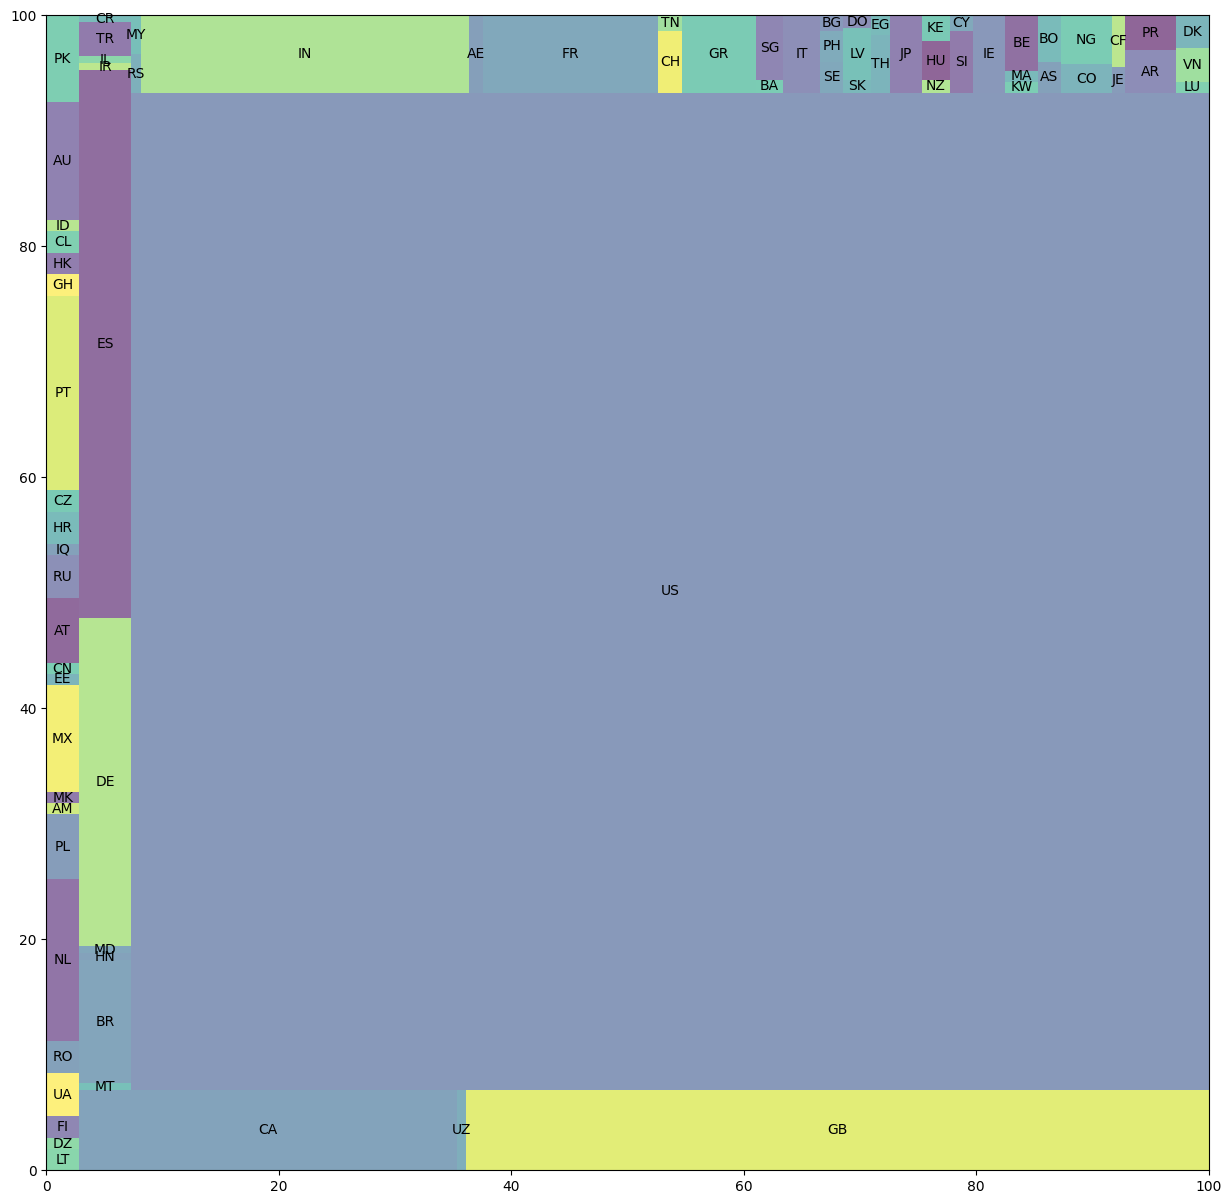

Accuracy: 85.86%


In [5]:
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import country_converter as coco
from sklearn.metrics import accuracy_score

# Create a Spark session
spark = SparkSession.builder.appName("YourAppName").getOrCreate()

# Load data into a Spark DataFrame
df = spark.read.csv("ds_salaries.csv", header=True, inferSchema=True)

# Work Year Distribution Pie Chart
year_data = df.groupBy("work_year").count().toPandas()
colors = ['navajowhite', 'gold', 'darkgoldenrod', 'hotpink']
fig, ax = plt.subplots()
ax.pie(year_data["count"], labels=year_data["work_year"], autopct='%1.2f%%', colors=colors)
ax.pie([1], radius=0.40, colors='white')
plt.title('Work Year Distribution')
plt.show()

# Salary Distribution Histogram
sns.histplot(data=df.toPandas(), x='salary_in_usd', kde=True)
plt.show()
# Count of Various Job Titles Bar Chart
job_title_count = df.groupBy('job_title').count().toPandas()
plt.figure(figsize=(15, 10))
job_title_count.plot(kind='bar', x='job_title', y='count')
plt.title('Count of Various Job Titles')
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

# Count of Various Size of Company Bar Chart
company_size_count = df.groupBy('company_size').count().toPandas()
plt.figure(figsize=(10, 5))
colors = ['indigo', 'mediumpurple', 'slateblue']
company_size_count.plot(kind='bar', x='company_size', y='count', color=colors)
plt.title('Count of Various Size of Company')
plt.xlabel('Company Size')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

# Employee Residence Squarify Plot
employee_residence_count = df.groupBy('employee_residence').count().toPandas()
plt.figure(figsize=(15, 15))
squarify.plot(sizes=employee_residence_count['count'], label=employee_residence_count['employee_residence'], alpha=0.6)
plt.show()

# Distribution of Employer Headquarters by Country Choropleth Map
company_location_salary = df.groupBy('company_location').agg(F.mean('salary_in_usd').alias('avg_salary')).toPandas()
company_location_salary['company_location'] = coco.convert(names=company_location_salary['company_location'], to='ISO3')
fig = px.choropleth(company_location_salary,
                    locations='company_location',
                    color='avg_salary',
                    title='Distribution of Employer Headquarters by Country')
fig.show()

# Calculate accuracy
actual_values = df.select('salary_in_usd').toPandas()['salary_in_usd']
predicted_values = df.select('salary').toPandas()['salary']

# Assuming salary is a classification label for demonstration purposes
# Replace this with your actual use case for accuracy calculation
accuracy = accuracy_score(actual_values, predicted_values)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Stop the Spark session
spark.stop()
